In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from pathlib import Path
from typing import Any, Dict, List, Optional
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cycler import cycler
import kaggle

In [3]:
from epimodel import *

In [4]:
plt.style.use("default")
plt.rc(
    'axes',
    prop_cycle=cycler(
        color=[
            '#51a7f9',
            '#cf51f9',
            '#70bf41',
            '#f39019',
            '#f9e351',
            '#f9517b',
            '#6d904f',
            '#8b8b8b',
            '#810f7c'
        ]
    )
)

In [5]:
data_dir = Path.cwd() / ".data"

## Download Data

To use the `kaggle` python package to download the Covid19 India dataset, you would need to configure a Kaggle API key and store it in the `.kaggle` directory in your home folder. Refer to [kaggle api documentation](https://github.com/Kaggle/kaggle-api#api-credentials) for more details.

In [8]:
kaggle_client = kaggle.KaggleApi()

In [11]:
kaggle_client.authenticate()

In [18]:
files_response = pd.DataFrame(dict(kaggle_client.datasets_list_files(dataset_slug="covid19-in-india", owner_slug="sudalairajkumar"))['datasetFiles'])

In [19]:
files_response

,ref,creationDate,datasetRef,description,fileType,name,ownerRef,totalBytes,url,columns
0,covid_19_india.csv,2021-05-03T06:30:32.6979549Z,sudalairajkumar/covid19-in-india,Number of covid-19 cases in India at daily level,.csv,covid_19_india.csv,sudalairajkumar,807386,https://www.kaggle.com/,"[{'order': 0, 'name': 'Sno', 'type': 'Uuid', '..."
1,covid_vaccine_statewise.csv,2021-05-03T06:30:32.6979549Z,sudalairajkumar/covid19-in-india,None,.csv,covid_vaccine_statewise.csv,sudalairajkumar,435955,https://www.kaggle.com/,"[{'order': 0, 'name': 'Updated On', 'type': 'S..."
2,StatewiseTestingDetails.csv,2021-05-03T06:30:32.6979549Z,sudalairajkumar/covid19-in-india,Testing details at state level,.csv,StatewiseTestingDetails.csv,sudalairajkumar,495914,https://www.kaggle.com/,"[{'order': 0, 'name': 'Date', 'type': 'DateTim..."


In [21]:
# kaggle_client.datasets_download(owner_slug="sudalairajkumar", dataset_slug="covid19-in-india")

## Data Loading

In [22]:
covid_data_india = pd.read_csv(data_dir / "india" / "covid_19_india.csv")
covid_data_vacc_india = pd.read_csv(data_dir / "india" / "covid_vaccine_statewise.csv")
covid_data_vacc_india["Updated On"] = pd.to_datetime(covid_data_vacc_india["Updated On"])
covid_data_india["Date"] = pd.to_datetime(covid_data_india["Date"])

In [23]:
covid_data_india_by_state = {
    k: v
    for k, v in covid_data_india.groupby("State/UnionTerritory")
}

In [24]:
covid_data_vacc_india_by_state = {
    k: v
    for k, v in covid_data_vacc_india.groupby("State")
}

In [25]:
covid_data_mh = covid_data_india_by_state["Maharashtra"]
covid_vacc_mh = covid_data_vacc_india_by_state["Maharashtra"]


In [26]:
covid_data_mh

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
14350,14351,2021-04-29,8:00 AM,Maharashtra,-,-,3730729,67214,4473394
14386,14387,2021-04-30,8:00 AM,Maharashtra,-,-,3799266,67985,4539553
14422,14423,2021-05-01,8:00 AM,Maharashtra,-,-,3868976,68813,4602472
14458,14459,2021-05-02,8:00 AM,Maharashtra,-,-,3930302,69615,4665754


In [27]:
covid_vacc_mh

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years(Age),30-45 years(Age),45-60 years(Age),60+ years(Age),Total Doses Administered
2268,2021-01-16,Maharashtra,5726.0,179.0,174.0,5726.0,0.0,3668.0,2057.0,1.0,85.0,5641.0,NaN,NaN,NaN,NaN,NaN,5726
2269,2021-01-17,Maharashtra,6521.0,269.0,216.0,6521.0,0.0,3953.0,2566.0,2.0,94.0,6427.0,NaN,NaN,NaN,NaN,NaN,6521
2270,2021-01-18,Maharashtra,6151.0,772.0,320.0,6151.0,0.0,3569.0,2581.0,1.0,105.0,6046.0,NaN,NaN,NaN,NaN,NaN,6151
2271,2021-01-19,Maharashtra,13699.0,1196.0,340.0,13699.0,0.0,6328.0,7367.0,4.0,214.0,13485.0,NaN,NaN,NaN,NaN,NaN,13699
2272,2021-01-20,Maharashtra,23880.0,1547.0,347.0,23880.0,0.0,9658.0,14205.0,17.0,439.0,23441.0,NaN,NaN,NaN,NaN,NaN,23880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,2021-04-29,Maharashtra,13360080.0,814655.0,5280.0,13360080.0,2510368.0,7186686.0,6171712.0,1682.0,1791689.0,14078759.0,NaN,NaN,NaN,NaN,NaN,15870448
2372,2021-04-30,Maharashtra,13561437.0,822120.0,5577.0,13561437.0,2622410.0,7294154.0,6265566.0,1717.0,1811340.0,14372507.0,NaN,NaN,NaN,NaN,NaN,16183847
2373,2021-01-05,Maharashtra,13637082.0,718001.0,4803.0,13637082.0,2655671.0,7336072.0,6299281.0,1729.0,1819842.0,14472911.0,3690.0,490409.0,1284189.0,6245315.0,5615842.0,16292753
2374,2021-02-05,Maharashtra,13677591.0,571836.0,3628.0,13677591.0,2665223.0,7360208.0,6315650.0,1733.0,1822158.0,14520656.0,3697.0,501503.0,1294982.0,6260563.0,5619437.0,16342814


In [28]:
covid_data_kr = covid_data_india_by_state["Kerala"]
covid_data_kr

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14346,14347,2021-04-29,8:00 AM,Kerala,-,-,1223185,5211,1495377
14382,14383,2021-04-30,8:00 AM,Kerala,-,-,1244301,5259,1533984
14418,14419,2021-05-01,8:00 AM,Kerala,-,-,1261801,5308,1571183
14454,14455,2021-05-02,8:00 AM,Kerala,-,-,1277294,5356,1606819


In [29]:
covid_data_mp = covid_data_india_by_state["Madhya Pradesh"]
covid_data_mp

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
256,257,2020-03-21,6:00 PM,Madhya Pradesh,4,0,0,0,4
279,280,2020-03-22,6:00 PM,Madhya Pradesh,4,0,0,0,4
302,303,2020-03-23,6:00 PM,Madhya Pradesh,6,0,0,0,6
325,326,2020-03-24,6:00 PM,Madhya Pradesh,7,0,0,0,7
349,350,2020-03-25,6:00 PM,Madhya Pradesh,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
14349,14350,2021-04-29,8:00 AM,Madhya Pradesh,-,-,439968,5424,538165
14385,14386,2021-04-30,8:00 AM,Madhya Pradesh,-,-,453331,5519,550927
14421,14422,2021-05-01,8:00 AM,Madhya Pradesh,-,-,466915,5616,563327
14457,14458,2021-05-02,8:00 AM,Madhya Pradesh,-,-,481477,5718,575706


In [30]:
def plot_covid_data_state(covid_df: Dict[str, pd.DataFrame], state: str, start_date=None):
    state_data = covid_df[state]
    if start_date is not None:
        state_data = covid_df[state].loc[covid_df[state].Date > start_date]
    ax = state_data.plot(x="Date", y=["Confirmed", "Cured", "Deaths"], figsize=(12, 8), title=state)
    ax.minorticks_on()
    ax.grid(True, which='major', linestyle='-', linewidth=0.25, axis='both', alpha=0.85, color="black")
    ax.grid(True, which='minor', linestyle='-.', linewidth=0.25, axis='both', alpha=0.7)

## State wise charts

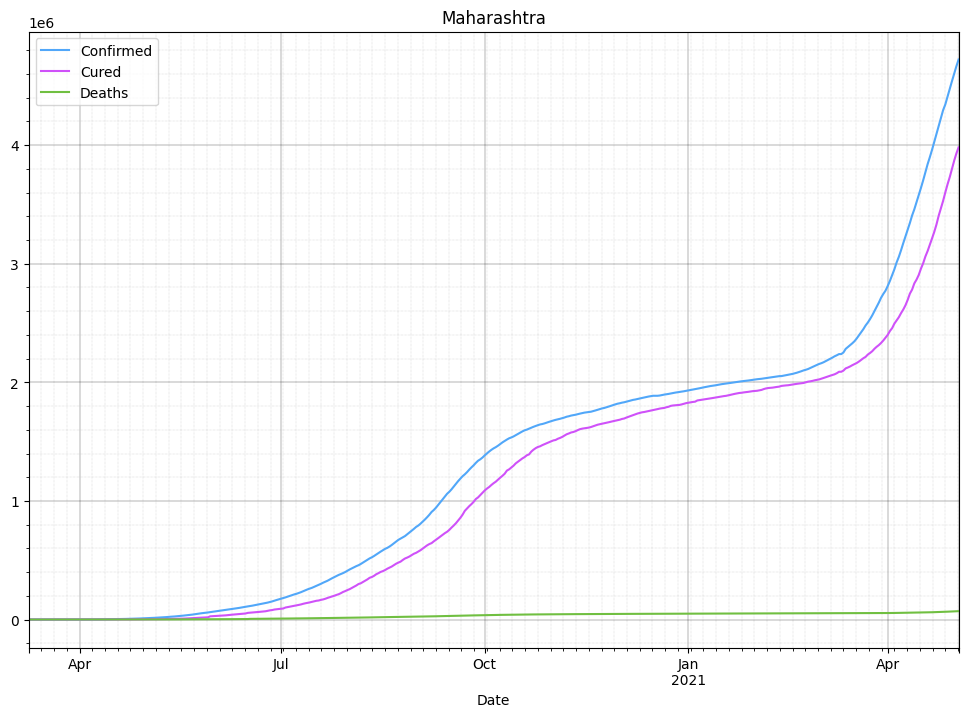

In [31]:
plot_covid_data_state(covid_data_india_by_state, state="Maharashtra")

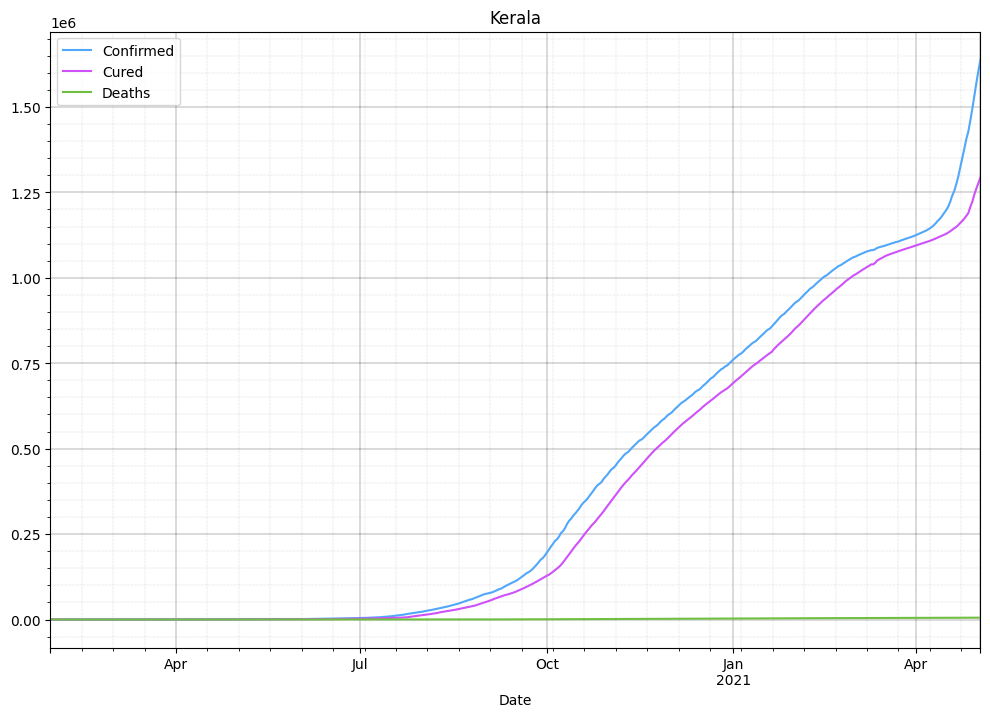

In [32]:
plot_covid_data_state(covid_data_india_by_state, state="Kerala")

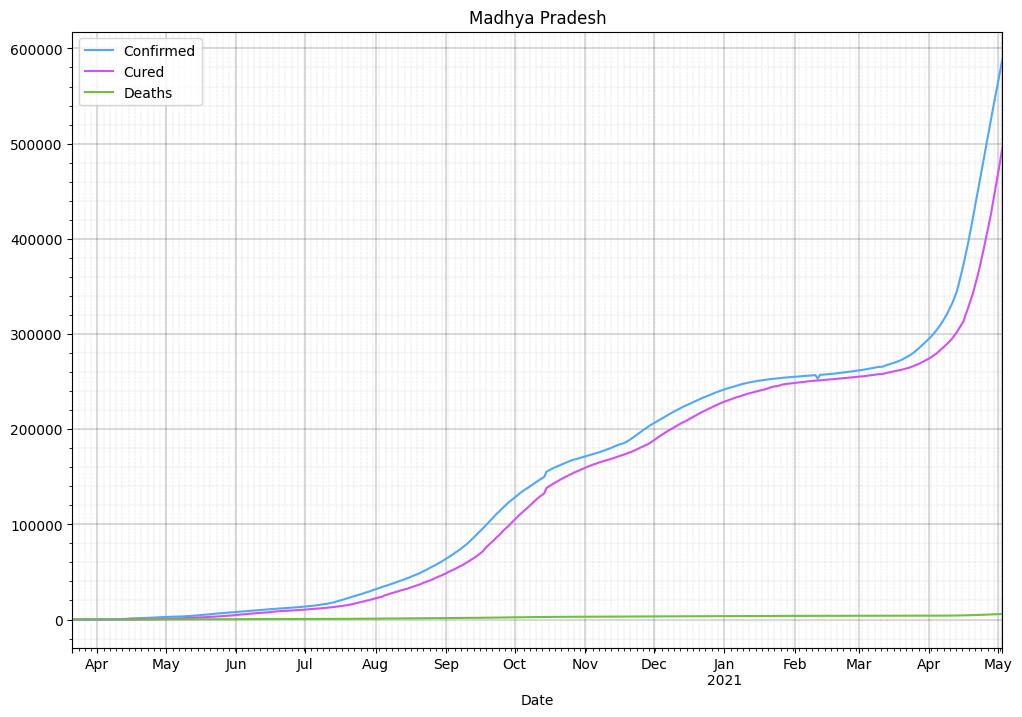

In [33]:
plot_covid_data_state(covid_data_india_by_state, state="Madhya Pradesh")

## Define Model

In [190]:
# Exposure factor
beta = 1.2
# Sympotmatic vs Asymptomatic
pa = 0.4
rb = 0.2
# Recovery rate
mu = 0.02
eps = 1.0 / 14
# Re-infection rate
rho = 1 / 10000 #(8 * 30)
# Death rate
p_d = 0.02

SIR = EpiModel(compartments=['S', 'E', 'Is', 'Ia', 'R', 'D'])
SIR.add_interaction('S', 'E', 'Is', beta)
SIR.add_interaction('S', 'E', 'Ia', beta*rb)

SIR.add_spontaneous('E', 'Is', eps*(1-pa))
SIR.add_spontaneous('E', 'Ia', eps*pa)

SIR.add_spontaneous('Ia', 'R', mu)
SIR.add_spontaneous('Is', 'R', mu*(1-p_d))
SIR.add_spontaneous('R', 'S', rho)
SIR.add_spontaneous('Is', 'D', mu*p_d)

In [191]:
SIR

Epidemic Model with 6 compartments and 8 transitions:

S + Is = E 1.200000
S + Ia = E 0.240000
E -> Is 0.042857
E -> Ia 0.028571
Is -> R 0.019600
Is -> D 0.000400
Ia -> R 0.020000
R -> S 0.000100

In [192]:
start_date = datetime.datetime(2021, 1, 1)

In [193]:
MH_pop = 112374333
start_mh = covid_data_mh[covid_data_mh.Date == start_date].iloc[-1]
I0 = int(start_mh.Confirmed - (start_mh.Cured + start_mh.Deaths))
R0 = (start_mh.Cured)
D0 = start_mh.Deaths

In [194]:
print("Initial Conditions: ")
print(f"Active Cases: {I0} \nCured: {R0} \nDead: {D0} \nstart date: {start_date}")

Initial Conditions: 
Active Cases: 54045 
Cured: 1828546 
Dead: 49521 
start date: 2021-01-01 00:00:00


In [195]:
SIR.simulate(
    timesteps=28+31+30+10,
    t_min=1,
    start_date=start_date.date(),
    S=MH_pop-I0,
    E=0,
    Is=int(I0*pa),
    Ia=int(I0*(1 - pa)),
    R=R0,
    D=D0
)

In [196]:
SIR.values_

,S,E,Is,Ia,R,D
2021-01-02,112312685,7760,21176,31790,1829458,49531
2021-01-03,112305350,14759,21068,31335,1830353,49535
2021-01-04,112298017,21162,21274,31146,1831259,49542
2021-01-05,112290689,27181,21746,31144,1832089,49551
2021-01-06,112283691,32451,22478,31231,1832988,49561
...,...,...,...,...,...,...
2021-04-06,107336999,1811304,1309337,877566,2855087,62107
2021-04-07,107139107,1879988,1360804,911689,2898168,62644
2021-04-08,106933856,1951116,1413990,947170,2943080,63188
2021-04-09,106722353,2023622,1469317,984052,2989273,63783


In [197]:
# ax0 = SIR.plot(normed=False, figsize=(12, 8), linewidth=1.75, title="Maharashtra - Simulation")
# ax0.legend(['Susceptible', 'Asypmptomatic', 'Symptomatic', 'Recovered', 'Exposed', 'Dead'])

In [198]:
res = pd.DataFrame({
    "Confirmed": SIR.Ia + SIR.Is + start_mh.Confirmed,
    "Cured": SIR.R,
    "Deaths": SIR.D
})

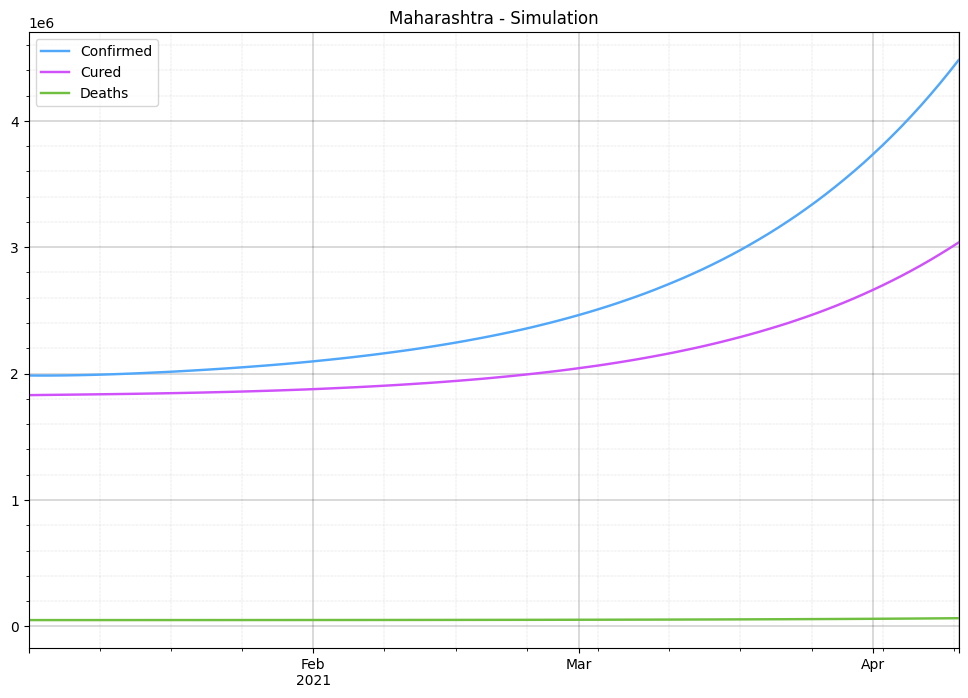

In [199]:
ax1 = res.plot(figsize=(12, 8), linewidth=1.75, title="Maharashtra - Simulation")
ax1.legend(['Confirmed', 'Cured', 'Deaths'])
ax1.minorticks_on()
ax1.grid(True, which='major', linestyle='-', linewidth=0.25, axis='both', alpha=0.85, color="black")
ax1.grid(True, which='minor', linestyle='-.', linewidth=0.25, axis='both', alpha=0.7)

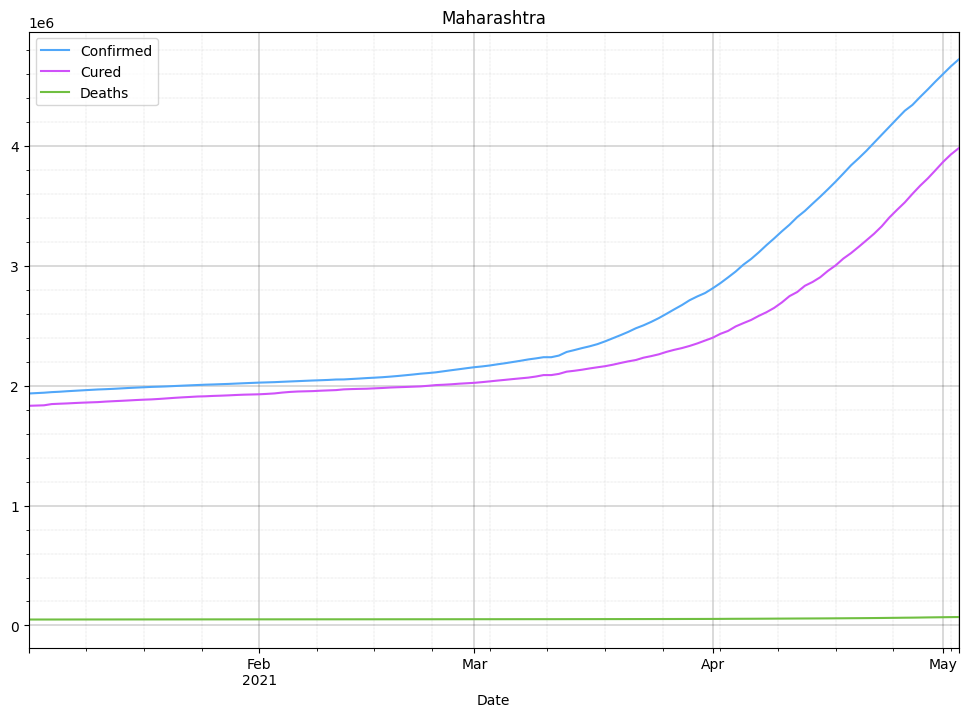

In [200]:
plot_covid_data_state(covid_data_india_by_state, state="Maharashtra", start_date=start_date)